In [14]:
!pip install tensorflow

In [18]:
# importação de bibliotecas
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt


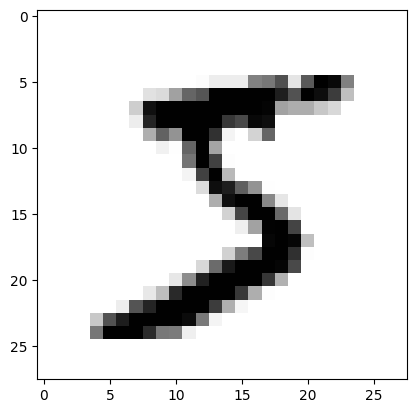

(28, 28)


In [16]:
# carregando o conjunto de dados MNIST
(imagens_treino, rotulos_treino), (imagens_teste, rotulos_teste) = mnist.load_data()

# exibindo a primeira imagem do conjunto de treinamento
plt.imshow(imagens_treino[0], cmap=plt.cm.binary)
plt.show()

# mostrando as dimensões da imagem
print(imagens_treino[0].shape)


In [19]:
# criando a estrutura da rede neural se baseando em uma antiga versão do YOLO
model = Sequential()

# camada de convolução
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# camada de maxpooling
model.add(MaxPooling2D((2, 2)))

# outra Camada de Convolução e MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

# camada de Flattening
model.add(Flatten())

# camadas Densas (Totalmente Conectadas)
model.add(Dense(128, input_dim=784, activation="relu"))
model.add(Dense(128, activation="relu"))

# compilando a rede neural
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# Exemplo de treinamento
model.fit(imagens_treino, rotulos_treino, epochs=10, batch_size=32, validation_data=(imagens_teste, rotulos_teste))


Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2222 - accuracy: 0.9553 - val_loss: 0.0620 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0537 - accuracy: 0.9844 - val_loss: 0.0587 - val_accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0433 - accuracy: 0.9867 - val_loss: 0.0570 - val_accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0481 - val_accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0318 - accuracy: 0.9903 - val_loss: 0.0498 - val_accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0536 - val_accuracy: 0.9849
Epoch 7/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0222 - accuracy: 0.9934 - val_loss: 0.0683 -

In [21]:
# Avaliação do modelo
test_loss, test_acc = model.evaluate(imagens_teste, rotulos_teste)
print(f'Acurácia no conjunto de teste: {test_acc}')


313/313 [==============================] - 3s 11ms/step - loss: 0.0618 - accuracy: 0.9883
Acurácia no conjunto de teste: 0.9883000254631042


In [22]:
# Exemplo de predição
predicoes = model.predict(imagens_teste)


313/313 [==============================] - 4s 12ms/step
